### Exploratory Data Analysis for SE1 region for year 2000.

In [1]:
import glob
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn import preprocessing as prep
from scipy.stats import pearsonr

In [2]:
reduced_data = pd.read_csv('two_years_merged_and_reduced.csv')
reduced_data.time = pd.to_datetime(reduced_data.time)
#convert 'time' column to index
reduced_data = reduced_data.set_index('time')
reduced_data = reduced_data.rename(columns= {'power-production' : 'PowerProduction'},)

In [3]:
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192384 entries, 2001-09-25 00:00:00+00:00 to 2000-10-24 23:00:00+00:00
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cluster           192384 non-null  float64
 1   region            192384 non-null  object 
 2   Temperature       192384 non-null  float64
 3   RelativeHumidity  192384 non-null  float64
 4   Wind_U            192384 non-null  float64
 5   Wind_V            192384 non-null  float64
 6   Pressure          192384 non-null  float64
 7   CloudCover        192384 non-null  float64
 8   WindGustSpeed     192384 non-null  float64
 9   distance          192384 non-null  float64
 10  PowerProduction   192384 non-null  float64
dtypes: float64(10), object(1)
memory usage: 17.6+ MB


In [4]:
df_SE1 = reduced_data[reduced_data.region == 'SE1']
df_SE1 = df_SE1.drop(labels=['region','cluster','distance'], axis=1)

In [5]:
#resampled to aggregate the hourly data into single day for all days
df_SE1_sampled_M = df_SE1.resample('M').mean()

#resampling adds datetime indexes which were not there in reduced data and fills its columns values with NaN. 
#Need to drop these rows
df_SE1_sampled_M = df_SE1_sampled_M.dropna()

In [6]:
#Normalization
scaler = prep.MinMaxScaler()
df_SE1_normalized_M = df_SE1_sampled_M.copy()
df_SE1_normalized_M[df_SE1_normalized_M.columns] = scaler.fit_transform(df_SE1_normalized_M[df_SE1_normalized_M.columns])

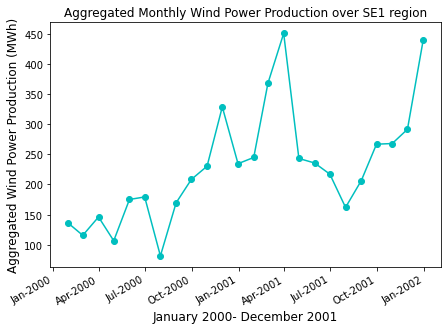

In [7]:
plt.figure(figsize=(7,5))
plt.plot(df_SE1_sampled_M.PowerProduction, 'c', marker='o')
#plt.plot(summer_sample.WindGustSpeed, 'g', marker='^')
plt.ylabel('Aggregated Wind Power Production (MWh)', fontsize=12)
plt.xlabel('January 2000- December 2001', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('Aggregated Monthly Wind Power Production over SE1 region')
plt.savefig("Aggregated_Wind_Power_M_SE1.png", transparent=True)

###### In year 2000, power production rises and reaches a peak in between Sep and Dec i.e in autumn
###### In year 2001, maximum power production is in April. also, we can see that in power production rises and reaches a peak in between Sep-Dec.

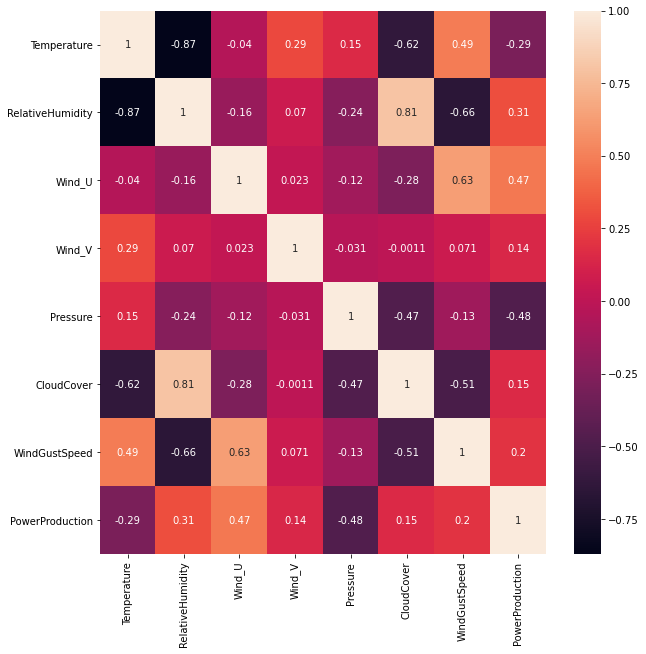

In [8]:
import seaborn as sns
df_small = df_SE1_sampled_M.iloc[:,:]
correlation_mat = df_small.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [9]:
win = df_SE1_normalized_M.loc['2000-01-31':'2000-03-31']
spr = df_SE1_normalized_M.loc['2000-04-30': '2000-05-31']
summr = df_SE1_normalized_M.loc['2000-06-30':'2000-08-31']
aut = df_SE1_normalized_M.loc['2000-09-30':'2000-11-30']

In [10]:
df_ss= [win, spr, summr, aut]

In [11]:
speed_list_M = []
power_list_M =[]
for season in df_ss:
    season_mean_speed = season['WindGustSpeed'].mean()
    season_mean_power = season['PowerProduction'].mean()
    speed_list_M.append(season_mean_speed)
    power_list_M.append(season_mean_power)
print(speed_list_M)
print(power_list_M)

[0.28730694255121564, 0.3827488201690534, 0.705752050473626, 0.42879543601495396]
[0.13830625298437746, 0.16070761724376303, 0.16780666067408945, 0.4720087663526356]


In [12]:
seasons_M = ['Winter-2000', 'Spring-2000', 'Summer-2000', 'Autumn-2000', 'Winter-2001', 'Spring-2001', 'Summer-2001', 'Autumn-2001']

In [13]:
#resampled to aggregate the hourly data into single day for all days
df_SE1_sampled_D = df_SE1.resample('D').mean()

#resampling adds datetime indexes which were not there in reduced data and fills its columns values with NaN. 
#Need to drop these rows
df_SE1_sampled_D = df_SE1_sampled_D.dropna()
df_SE1_sampled_D.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 668 entries, 2000-01-01 00:00:00+00:00 to 2001-12-31 00:00:00+00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       668 non-null    float64
 1   RelativeHumidity  668 non-null    float64
 2   Wind_U            668 non-null    float64
 3   Wind_V            668 non-null    float64
 4   Pressure          668 non-null    float64
 5   CloudCover        668 non-null    float64
 6   WindGustSpeed     668 non-null    float64
 7   PowerProduction   668 non-null    float64
dtypes: float64(8)
memory usage: 47.0 KB


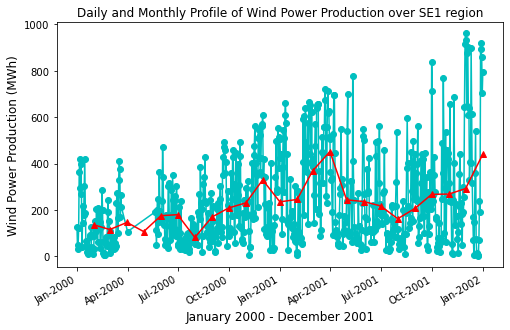

In [36]:
plt.figure(figsize=(8,5))
plt.plot(df_SE1_sampled_D.PowerProduction, 'c', marker='o')
plt.plot(df_SE1_sampled_M.PowerProduction, 'r', marker='^')
#plt.plot(summer_sample.WindGustSpeed, 'g', marker='^')
plt.ylabel('Wind Power Production (MWh)', fontsize=12)
plt.xlabel('January 2000 - December 2001', fontsize=12)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Daily and Monthly Profile of Wind Power Production over SE1 region")
plt.savefig("Aggregated_Wind_Power_D_M_SE1.png", transparent=True)

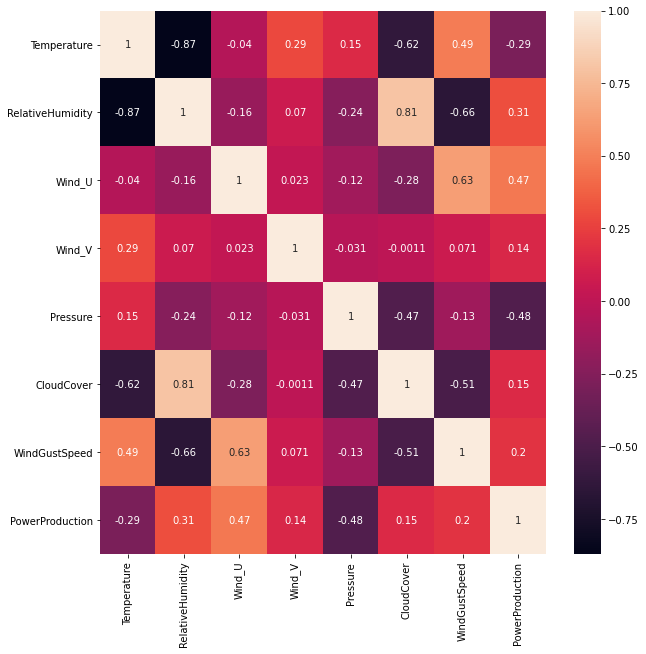

In [15]:
import seaborn as sns
df_small = df_SE1_sampled_M.iloc[:,:]
correlation_mat = df_small.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [16]:
scaler = prep.MinMaxScaler()
df_SE1_normalized_D = df_SE1_sampled_D.copy()
df_SE1_normalized_D[df_SE1_normalized_D.columns] = scaler.fit_transform(df_SE1_normalized_D[df_SE1_normalized_D.columns])

In [17]:
winter_sample = df_SE1_normalized_D.loc['2000-01-01': '2000-03-31']
spring_sample = df_SE1_normalized_D.loc['2000-04-01': '2000-05-31']
summer_sample = df_SE1_normalized_D.loc['2000-06-01': '2000-08-31']
autumn_sample = df_SE1_normalized_D.loc['2000-09-01': '2000-11-30']

In [18]:
df_seasons = [winter_sample, spring_sample, summer_sample, autumn_sample]

In [19]:
# speed_list = []
# power_list =[]
# for season in df_seasons:
#     max_index = season['WindGustSpeed'].idxmax()
#     #print(season['WindGustSpeed'].idxmax())
#     print('WindGustSpeed of {}: {}'.format(max_index, season.loc[max_index].WindGustSpeed))
#     print('PowerProduction of {}: {} \n'.format(max_index, season.loc[max_index].PowerProduction))
#     speed_list.append(season.loc[max_index].WindGustSpeed)
#     power_list.append(season.loc[max_index].PowerProduction)

In [20]:
speed_list = []
power_list =[]
for season in df_seasons:
    season_mean_speed = season['WindGustSpeed'].mean()
    season_mean_power = season['PowerProduction'].mean()
    speed_list.append(season_mean_speed)
    power_list.append(season_mean_power)
print(speed_list)
print(power_list)

[0.32269001153167803, 0.426002737589263, 0.42621239931261284, 0.357868298692882]
[0.13496564366138006, 0.1747618607264834, 0.1472506393651924, 0.265344288408495]


In [21]:
seasons = ['winter', 'spring', 'summer', 'autumn']

speed_idx = speed_list.index(max(speed_list))
power_idx = power_list.index(max(power_list))

print('maximum wind speed in {}'.format(seasons[speed_idx]))
print('maximum wind power produced in {}'.format(seasons[power_idx]))

maximum wind speed in summer
maximum wind power produced in autumn


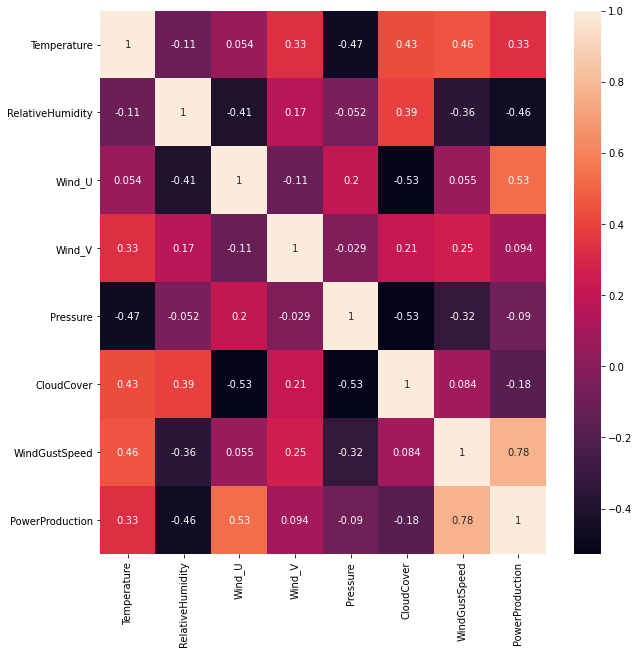

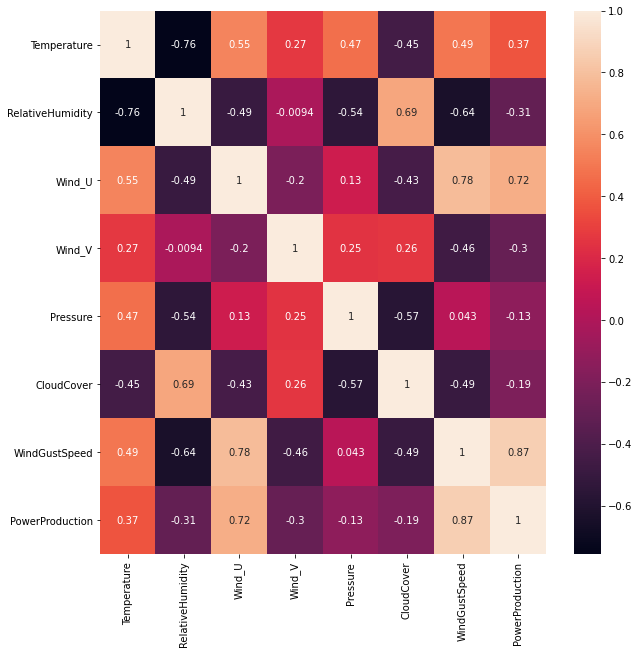

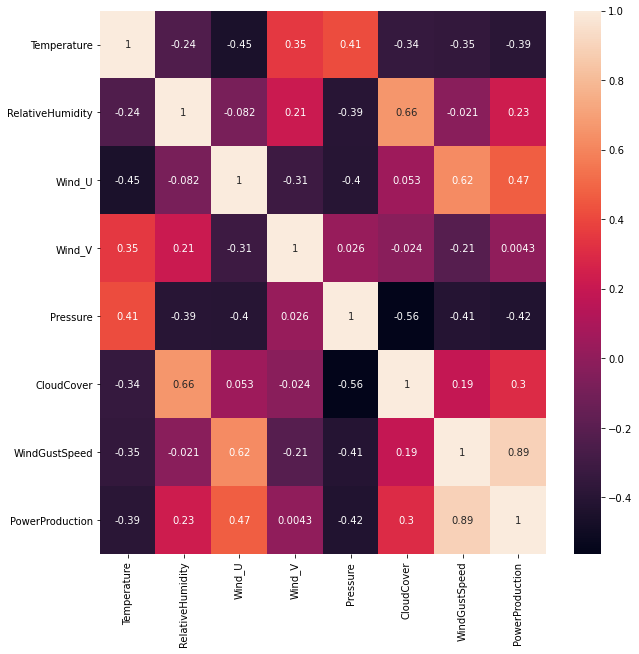

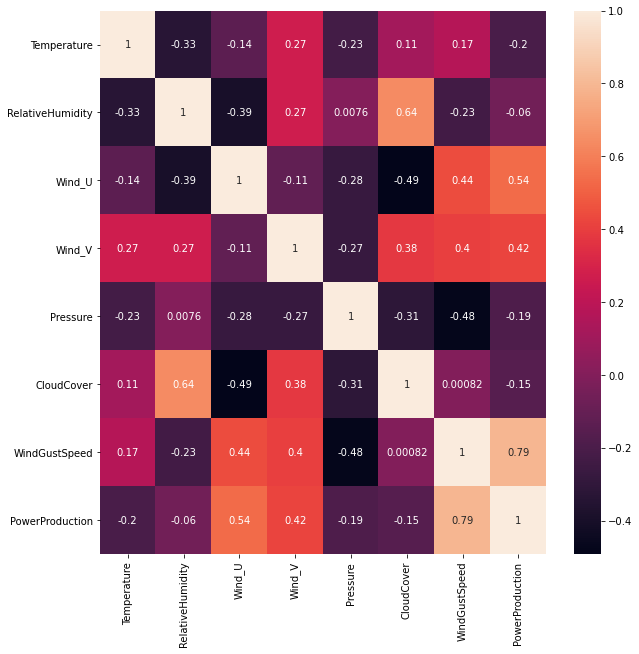

In [22]:
import seaborn as sns
for season in df_seasons:
    df_small = season.iloc[:,:]
    correlation_mat = df_small.corr()
    plt.subplots(figsize=(10,10))
    sns.heatmap(correlation_mat, annot = True)
    plt.show()

Text(0.5, 1.0, 'Summer')

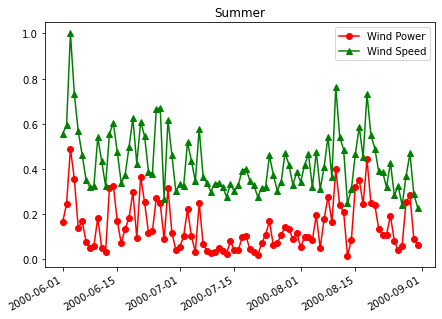

In [23]:
#wind power production vs wind speed in Septempber, 2001.
plt.figure(figsize=(7,5))
plt.plot(summer_sample.PowerProduction, 'r', marker='o')
plt.plot(summer_sample.WindGustSpeed, 'g', marker='^')
plt.gcf().autofmt_xdate()
plt.legend(['Wind Power', 'Wind Speed'])
plt.title('Summer')

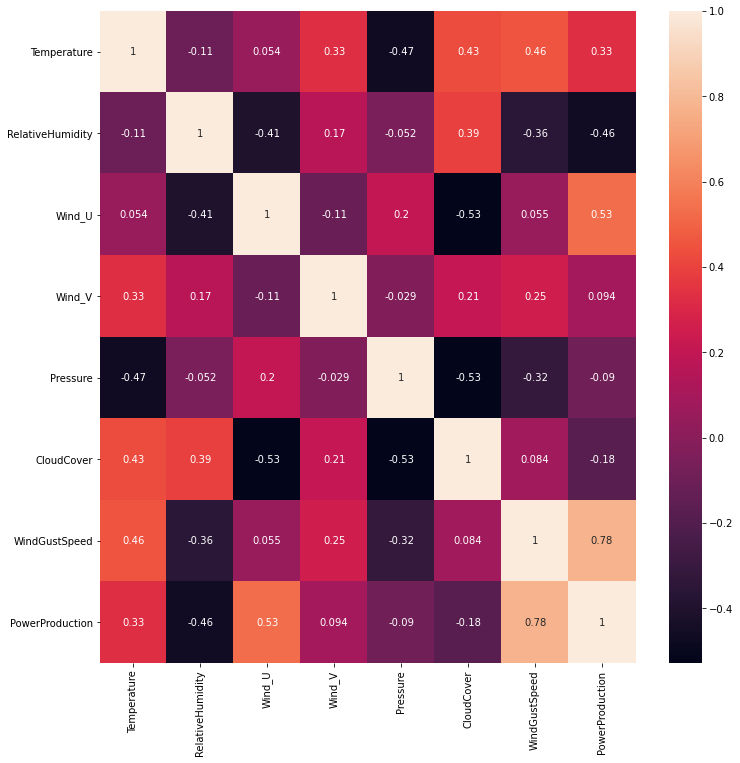

In [24]:
import seaborn as sns
df_small = winter_sample.iloc[:,:]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

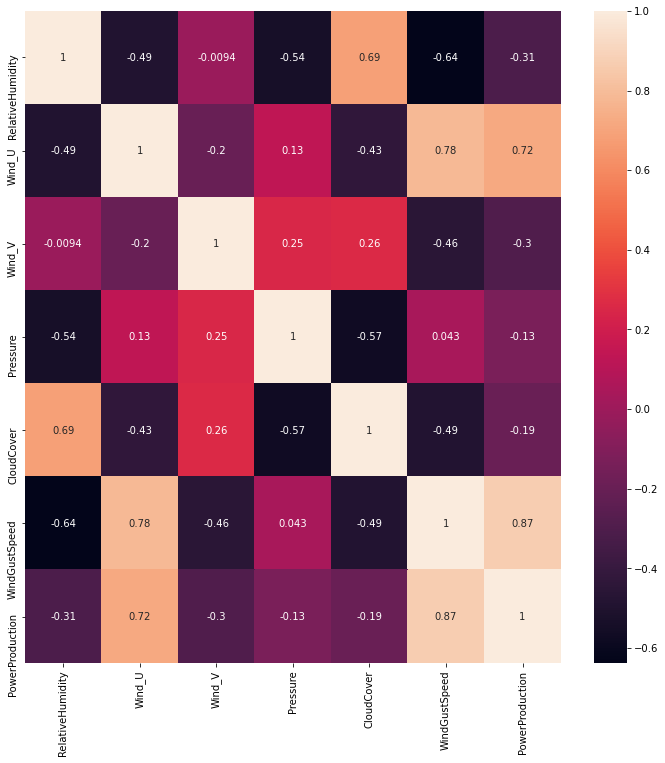

In [25]:
import seaborn as sns
df_small = spring_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

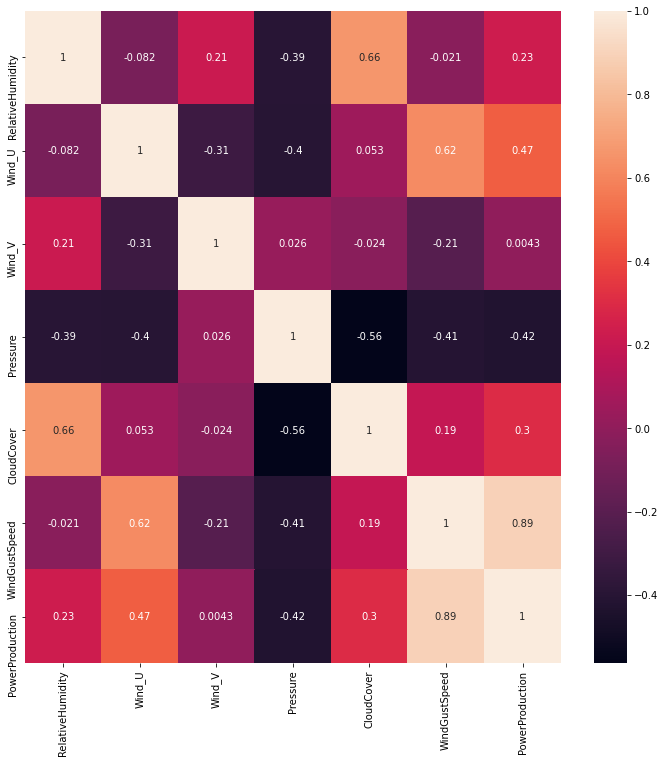

In [26]:
import seaborn as sns
df_small = summer_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

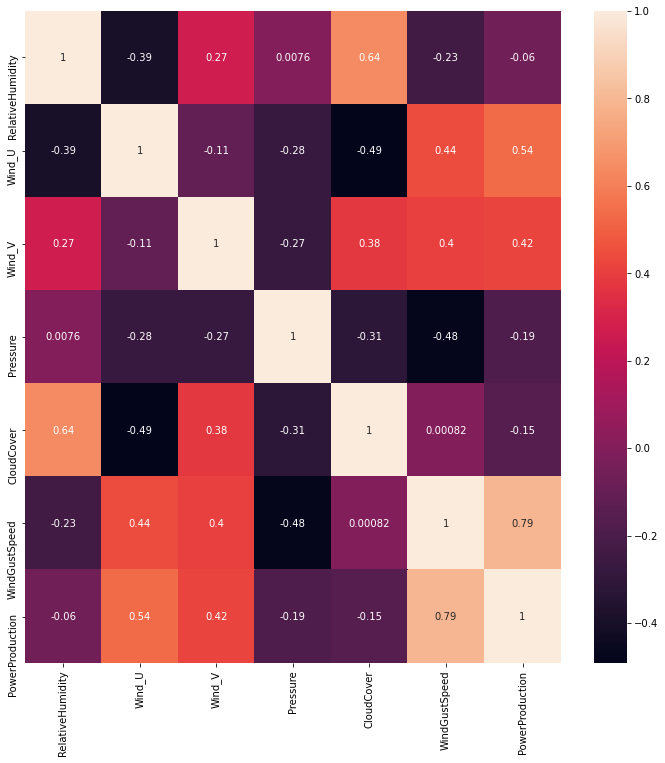

In [27]:
import seaborn as sns
df_small = autumn_sample.iloc[:,1:10]
correlation_mat = df_small.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(correlation_mat, annot = True)
plt.show()

###### maximum average wind speed in summer and  average wind power produced in autumn. speed and power in summer: 0.42621 & 0.1472 ;  speed and power in autumn:  0.35786 & 0.26534
###### coorelation value of wind speed and power production 0.78-0.89. Maximum in summer
###### avg wind speed and power:
'[0.32269001153167803, 0.426002737589263, 0.42621239931261284, 0.357868298692882] and 
[0.13496564366138006, 0.1747618607264834, 0.1472506393651924, 0.265344288408495]'

In [28]:
winter_sample_01 = df_SE1_normalized_D.loc['2001-01-01': '2001-03-31']
spring_sample_01 = df_SE1_normalized_D.loc['2001-04-01': '2001-05-31']
summer_sample_01 = df_SE1_normalized_D.loc['2001-06-01': '2001-08-31']
autumn_sample_01 = df_SE1_normalized_D.loc['2001-09-01': '2001-11-30']

In [29]:
df_seasons_f = [winter_sample, spring_sample, summer_sample, autumn_sample, winter_sample_01, spring_sample_01, summer_sample_01, autumn_sample_01]

In [30]:
speed_list_f = []
power_list_f =[]
wind_u_list_f = []
wind_v_list_f = []
for season in df_seasons_f:
    season_mean_speed = season['WindGustSpeed'].mean()
    season_mean_power = season['PowerProduction'].mean()
    season_mean_wind_u = season['Wind_U'].mean()
    season_mean_wind_v = season['Wind_V'].mean()
    #print(season_mean_speed, season_mean_power)
    speed_list_f.append(season_mean_speed)
    power_list_f.append(season_mean_power)
    wind_u_list_f.append(season_mean_wind_u)
    wind_v_list_f.append(season_mean_wind_v)
print(speed_list_f)
print(power_list_f)

[0.32269001153167803, 0.426002737589263, 0.42621239931261284, 0.357868298692882, 0.3974030519751385, 0.35907482114425426, 0.3776837012332993, 0.3089334330306463]
[0.13496564366138006, 0.1747618607264834, 0.1472506393651924, 0.265344288408495, 0.3678522127548779, 0.24794666216651665, 0.20183917846368593, 0.28534142063617124]


In [31]:
seasons_f = ['Winter-2000', 'Spring-2000', 'Summer-2000', 'Autumn-2000', 'Winter-2001', 'Spring-2001', 'Summer-2001', 'Autumn-2001']

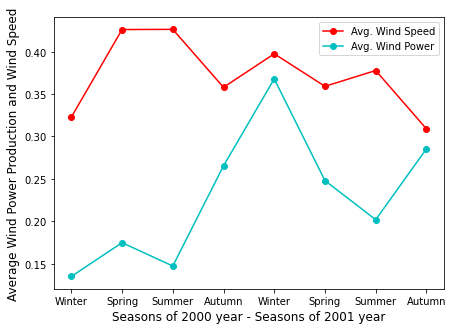

In [44]:
plt.figure(figsize=(7,5))
plt.plot(seasons_f,speed_list_f, 'r', marker='o')
plt.plot(seasons_f,power_list_f, 'c', marker='o')

plt.ylabel('Average Wind Power Production and Wind Speed', fontsize=12)
plt.xlabel('Seasons of 2000 year - Seasons of 2001 year', fontsize=12)
ticks = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ["Winter", "Spring", "Summer", "Autumn", "Winter", "Spring", "Summer", "Autumn"]
plt.xticks(ticks, labels)
#plt.title('Seasonal Average Wind Power Production and Wind Speed over SE1')
plt.legend(['Avg. Wind Speed','Avg. Wind Power'])
plt.savefig("Seasonal_Avg_Wind_Prod_SE1.png", transparent=True)

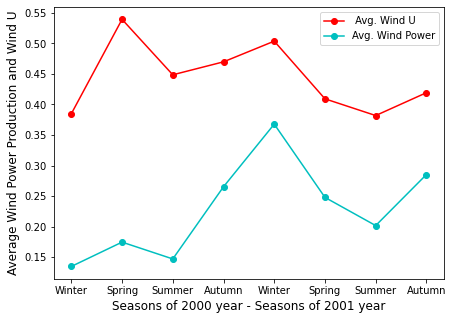

In [41]:
plt.figure(figsize=(7,5))
plt.plot(seasons_f,wind_u_list_f, 'r', marker='o')
plt.plot(seasons_f,power_list_f, 'c', marker='o')
plt.ylabel('Average Wind Power Production and Wind U', fontsize=12)
plt.xlabel('Seasons of 2000 year - Seasons of 2001 year', fontsize=12)
ticks = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ["Winter", "Spring", "Summer", "Autumn", "Winter", "Spring", "Summer", "Autumn"]
plt.xticks(ticks, labels)
#plt.title('Seasonal Average Wind Power Production and Wind U Component over SE1')
plt.legend([' Avg. Wind U', 'Avg. Wind Power'])
plt.savefig("Seasonal_Avg_Wind_Prod_Wind_U_SE1.png", transparent=True)

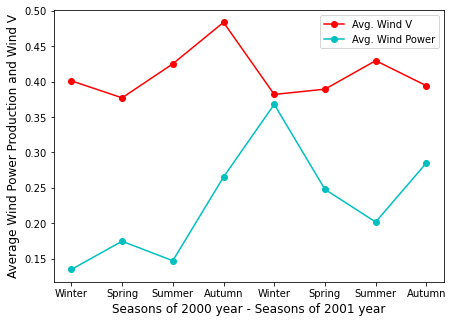

In [42]:
plt.figure(figsize=(7,5))
plt.plot(seasons_f,wind_v_list_f, 'r', marker='o')
plt.plot(seasons_f,power_list_f, 'c', marker='o')
plt.ylabel('Average Wind Power Production and Wind V', fontsize=12)
plt.xlabel('Seasons of 2000 year - Seasons of 2001 year', fontsize=12)
ticks = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ["Winter", "Spring", "Summer", "Autumn", "Winter", "Spring", "Summer", "Autumn"]
plt.xticks(ticks, labels)
#plt.title('Seasonal Average Wind Power Production and Wind V over SE1')
plt.legend(['Avg. Wind V','Avg. Wind Power'])
plt.savefig("Seasonal_Avg_Wind_Prod_Wind_V_SE1.png", transparent=True)